# zgulde plotting lib demo

- [2-series bar plot](#2-series-bar-plot)
- [bar plot by group](#bar-plot-by-group)
- [histograms by group](#histograms-by-group)
- [Scatter by group](#Scatter-by-group)
- [3d plots](#3d-plots)
- [dual axis plotting](#dual-axis-plotting)
- [Comapre 2 Categorical Vars](#Comapre-2-Categorical-Vars)
    - [Heatmaps From Crosstabs](#Heatmaps-From-Crosstabs)
    - [A "scatter plot" for group proportions](#A-"scatter-plot"-for-group-proportions)
    - [Group Proportions Bar Chart](#Group-Proportions-Bar-Chart)

In [1]:
import pydataset
import matplotlib.pyplot as plt

import zgulde.ds_util.plotting as zplot

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.style.use(zplot.style)

A couple datasets for demonstration purposes:

In [3]:
tips = pydataset.data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
mpg = pydataset.data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## 2-series bar plot

(<Figure size 1152x648 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x11f70e358>,
  <matplotlib.axes._subplots.AxesSubplot at 0x11f7c9e48>))

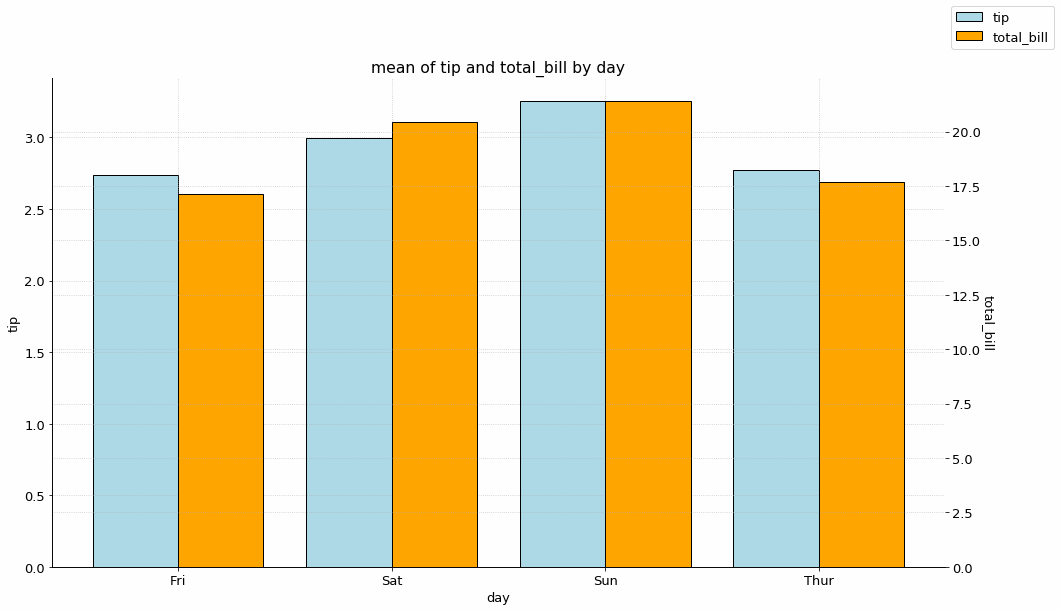

In [5]:
zplot.bar_dual_y(tips, 'day', 'tip', 'total_bill')

## bar plot by group

(<Figure size 1152x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11fc88470>)

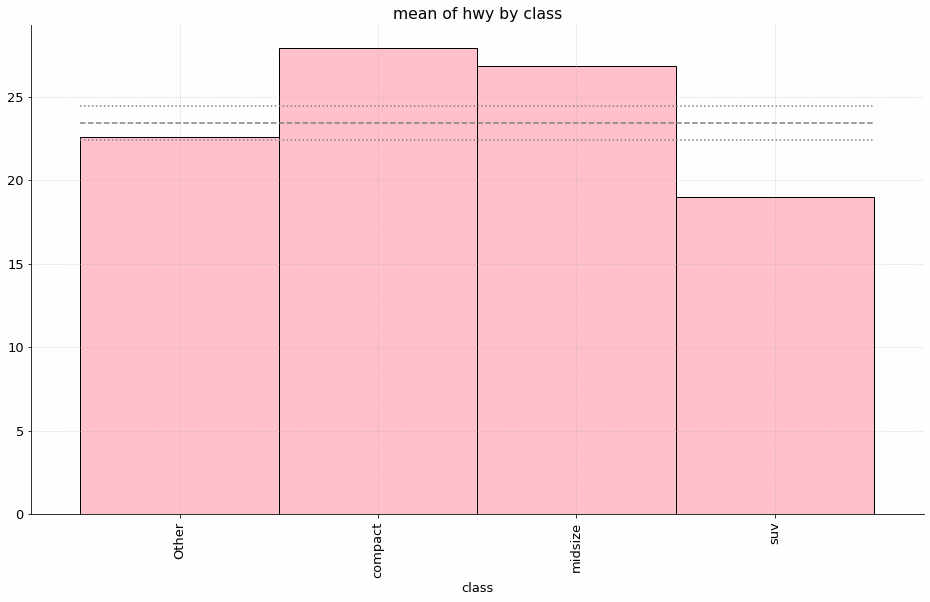

In [6]:
zplot.bar_by_group(mpg.hwy, mpg['class'])

## histograms by group

(<Figure size 1152x648 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ffe4940>,
       dtype=object))

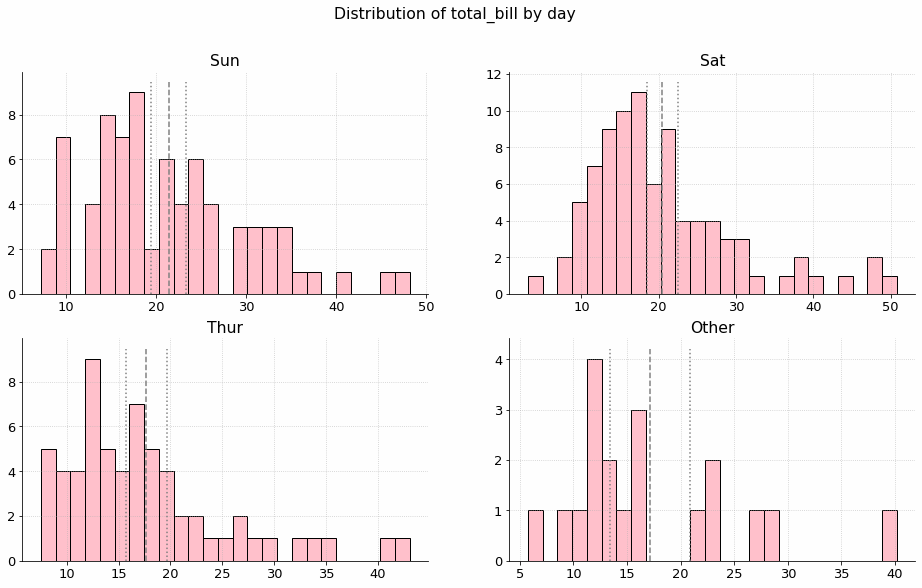

In [7]:
zplot.hist_by_group(tips.total_bill, tips.day)

## Scatter by group

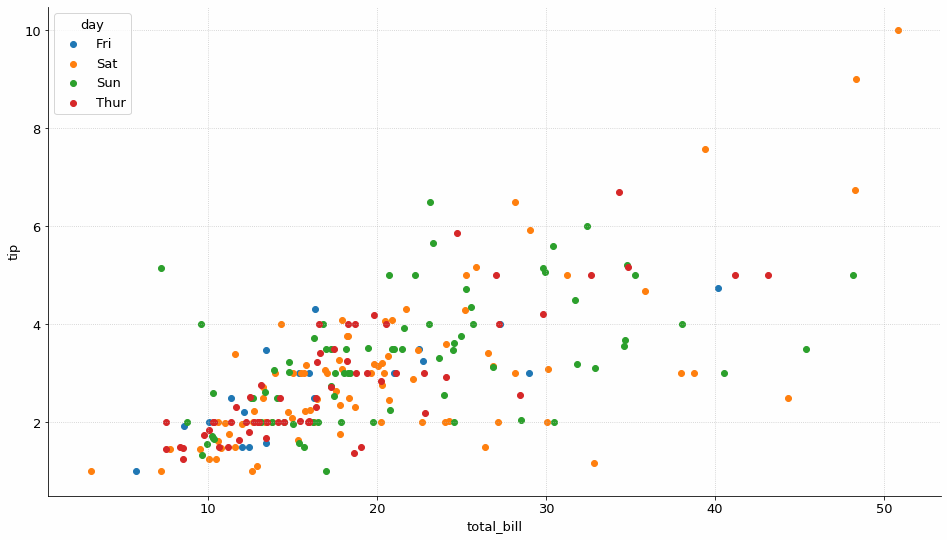

In [8]:
zplot.scatter_by_group(tips, 'total_bill', 'tip', 'day')

## 3d plots

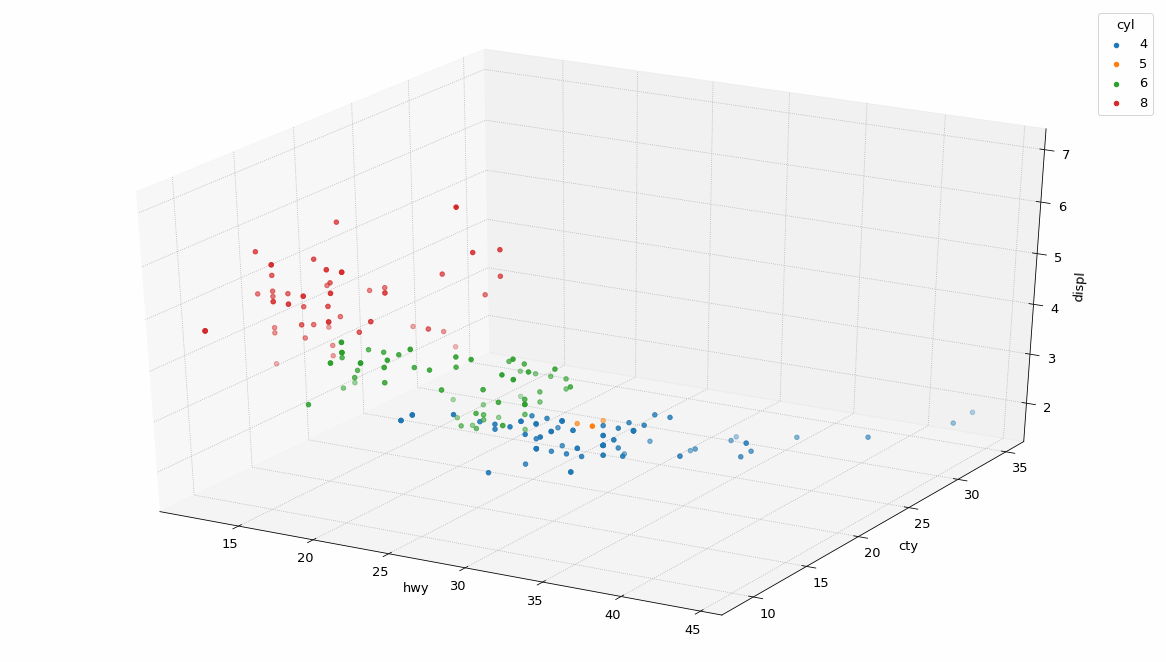

In [9]:
zplot.plot_3d(mpg, 'hwy', 'cty', 'displ', 'cyl')

## dual axis plotting

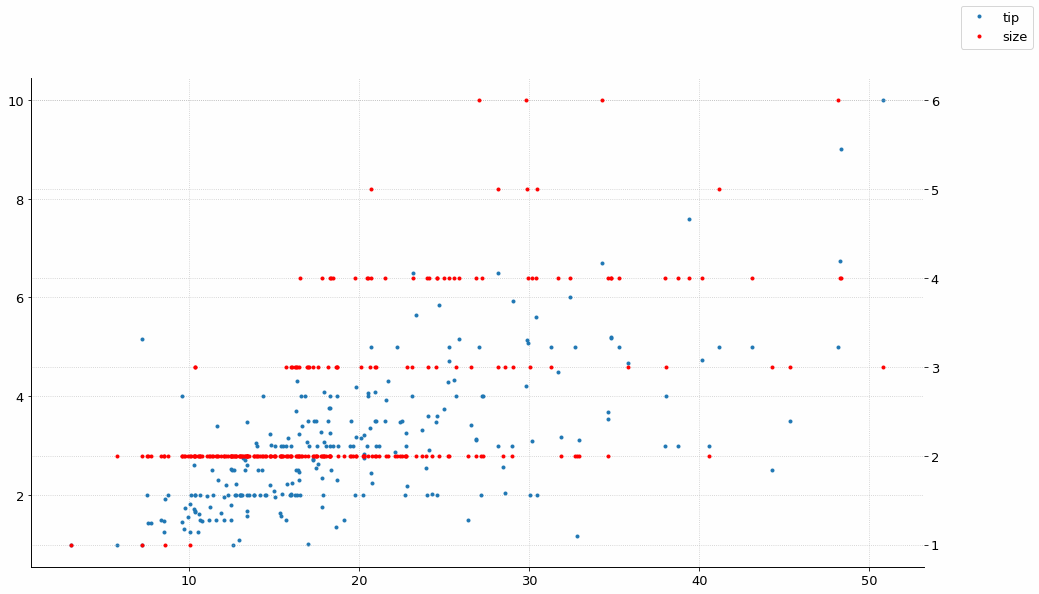

In [10]:
fig = zplot.dual_axis(tips, 'total_bill')('tip', '.', label='tip')('size', 'r.', label='size')
fig.legend()

(<Figure size 1152x648 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x122c69e48>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10e4a66d8>))

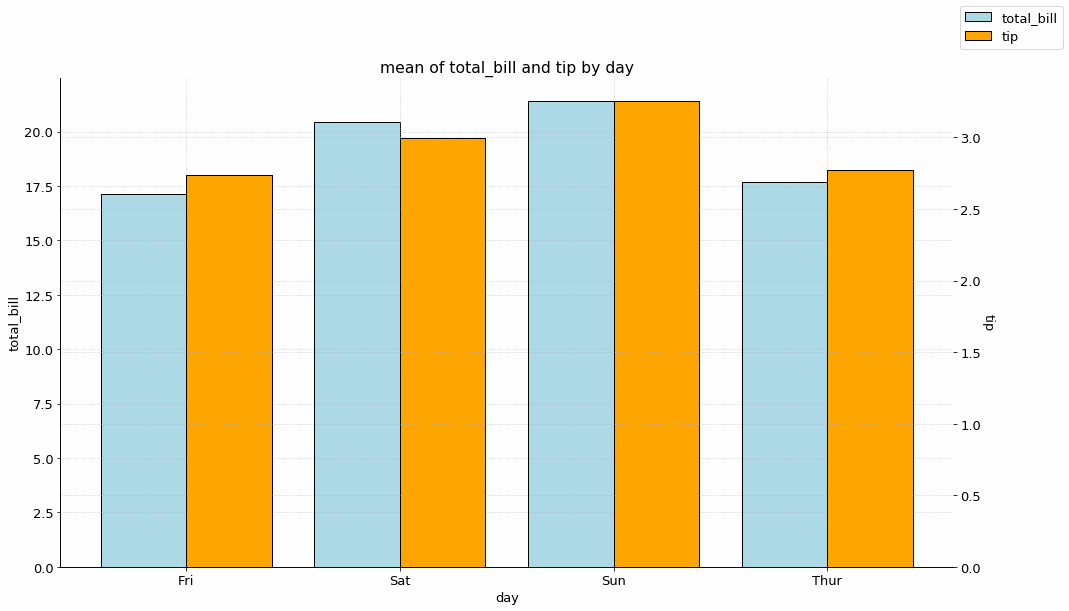

In [11]:
zplot.bar_dual_y(tips, 'day', 'total_bill', 'tip')

## Comapre 2 Categorical Vars

### Heatmaps From Crosstabs

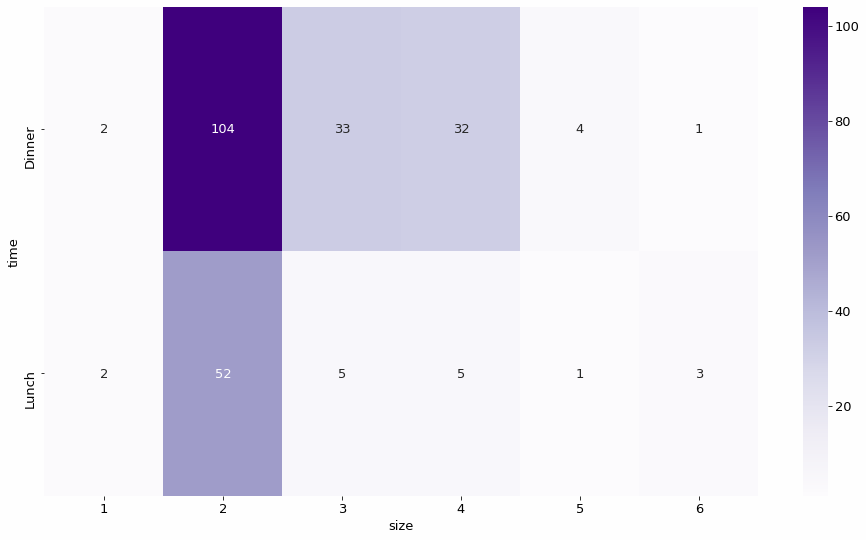

In [12]:
zplot.crosstab_heatmap(tips.time, tips['size'])

The values don't have to be just the counts.

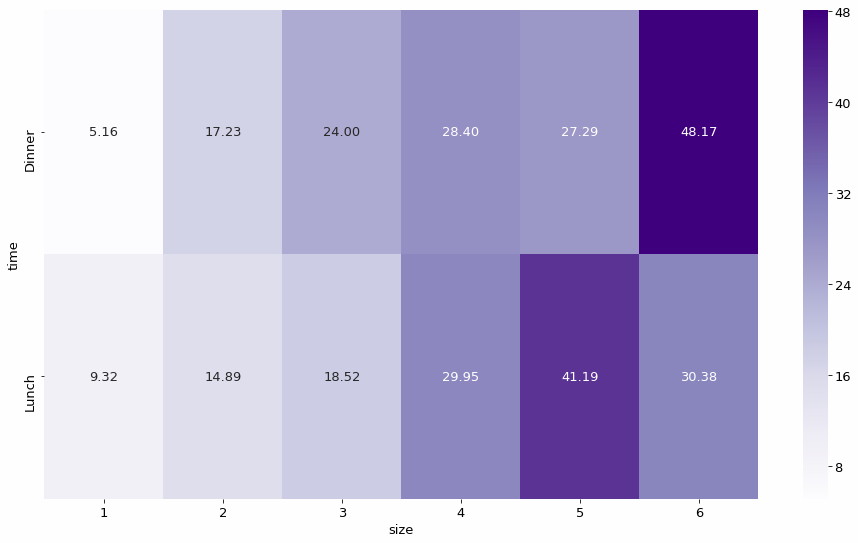

In [13]:
zplot.crosstab_heatmap(tips.time, tips['size'], values=tips.total_bill, aggfunc='mean')

### A "scatter plot" for group proportions

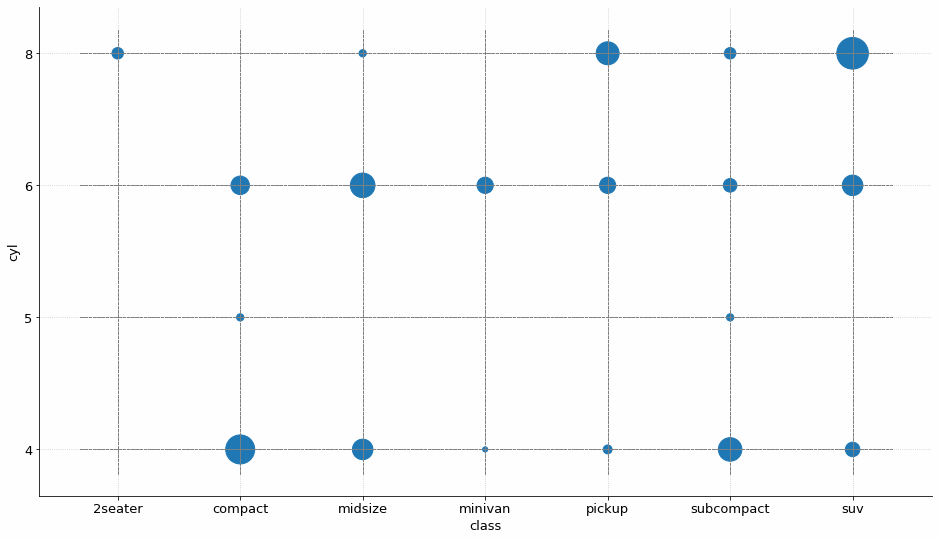

In [14]:
zplot.crosstab_scatter(mpg['class'], mpg.cyl)

The `scale` argument changes the size of the circles.

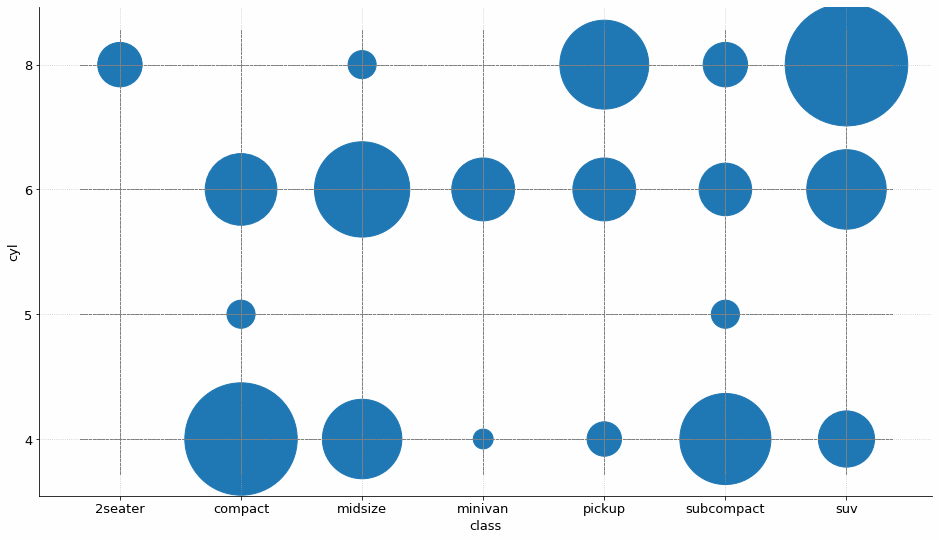

In [15]:
zplot.crosstab_scatter(mpg['class'], mpg.cyl, scale=15_000)

The values that the size of the circle is based on can be customized as well.

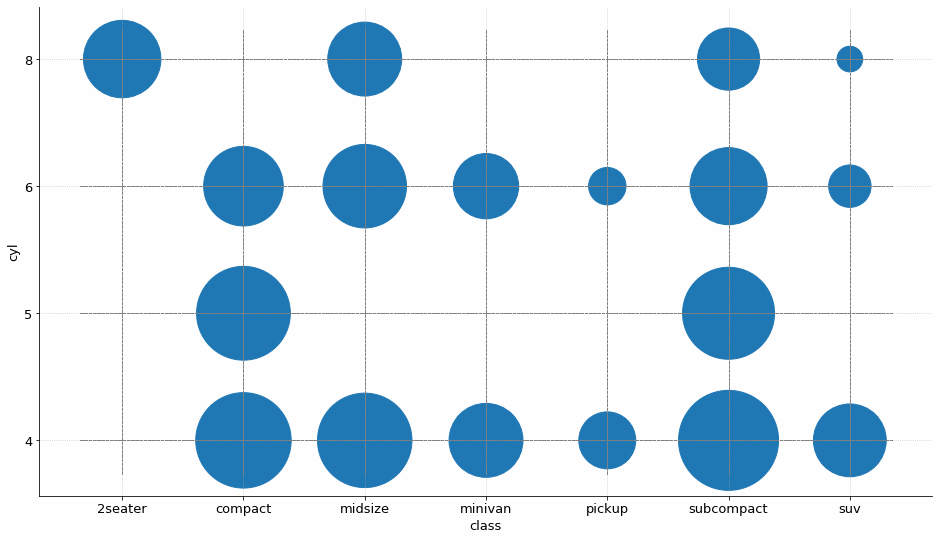

In [16]:
zplot.crosstab_scatter(mpg['class'], mpg.cyl, values=mpg.hwy, aggfunc='mean', scale=10_000)

### Group Proportions Bar Chart

Raw Counts

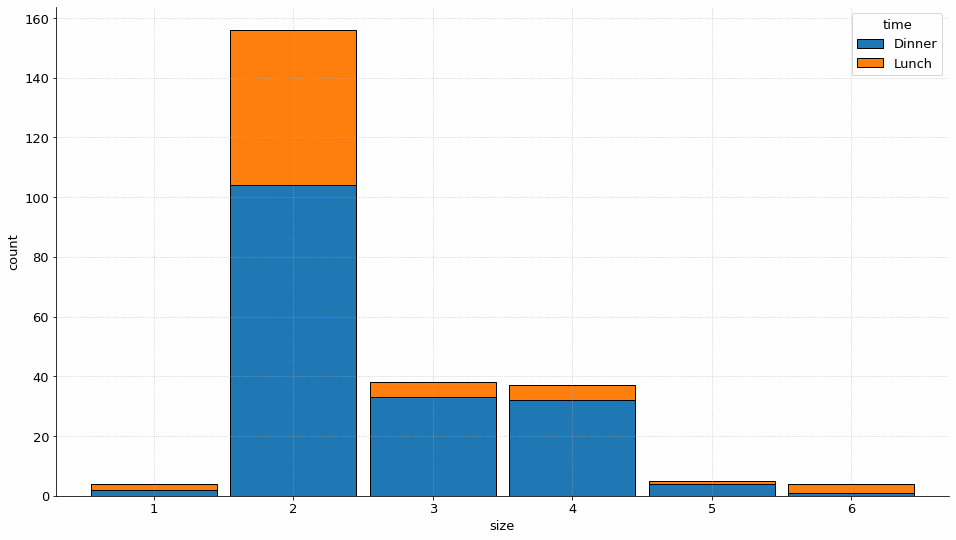

In [17]:
zplot.group_proportions(tips, 'size', 'time')

Proportions

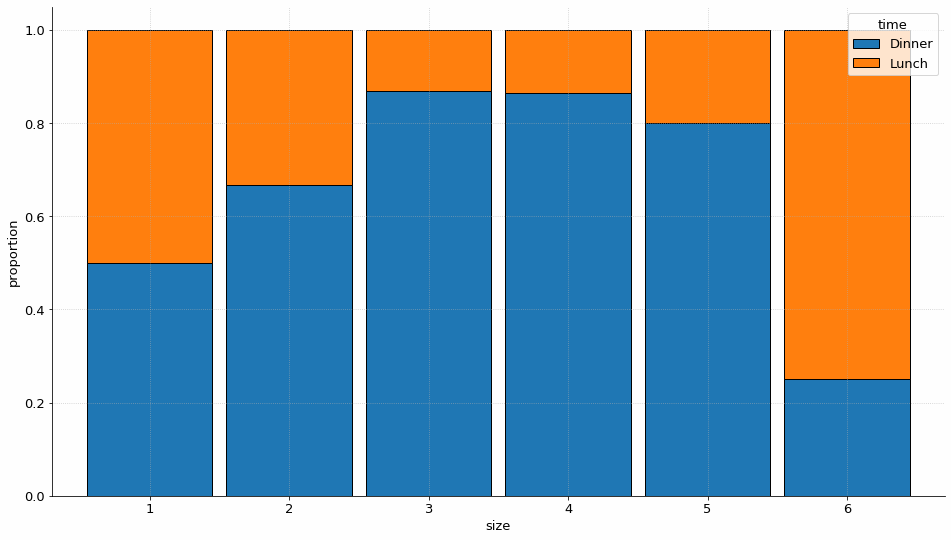

In [18]:
zplot.group_proportions(tips, 'size', 'time', proportions=True)